# Stress Predictor

In [21]:
import numpy as np
import pandas as pd

In [22]:
df=pd.read_csv('F:\ML Project\Stress.csv')

In [23]:
df

,subreddit,post_id,sentence_range,text,label,confidence,social_timestamp
0,ptsd,8601tu,"(15, 20)","He said he had not felt that way before, sugge...",1,0.800000,1521614353
1,assistance,8lbrx9,"(0, 5)","Hey there r/assistance, Not sure if this is th...",0,1.000000,1527009817
2,ptsd,9ch1zh,"(15, 20)",My mom then hit me with the newspaper and it s...,1,0.800000,1535935605
3,relationships,7rorpp,"[5, 10]","until i met my new boyfriend, he is amazing, h...",1,0.600000,1516429555
4,survivorsofabuse,9p2gbc,"[0, 5]",October is Domestic Violence Awareness Month a...,1,0.800000,1539809005
...,...,...,...,...,...,...,...
2833,relationships,7oee1t,"[35, 40]","* Her, a week ago: Precious, how are you? (I i...",0,1.000000,1515187044
2834,ptsd,9p4ung,"[20, 25]",I don't have the ability to cope with it anymo...,1,1.000000,1539827412
2835,anxiety,9nam6l,"(5, 10)",In case this is the first time you're reading ...,0,1.000000,1539269312
2836,almosthomeless,5y53ya,"[5, 10]",Do you find this normal? They have a good rela...,0,0.571429,1488938143


## 1.Data Cleaning

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2838 entries, 0 to 2837
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   subreddit         2838 non-null   object 
 1   post_id           2838 non-null   object 
 2   sentence_range    2838 non-null   object 
 3   text              2838 non-null   object 
 4   label             2838 non-null   int64  
 5   confidence        2838 non-null   float64
 6   social_timestamp  2838 non-null   int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 155.3+ KB


In [25]:
df.rename(columns={'label':'target'},inplace=True)

In [26]:
df.drop(columns=['confidence','social_timestamp','post_id','sentence_range'],inplace=True)

In [28]:
df

,subreddit,text,target
0,ptsd,"He said he had not felt that way before, sugge...",1
1,assistance,"Hey there r/assistance, Not sure if this is th...",0
2,ptsd,My mom then hit me with the newspaper and it s...,1
3,relationships,"until i met my new boyfriend, he is amazing, h...",1
4,survivorsofabuse,October is Domestic Violence Awareness Month a...,1
...,...,...,...
2833,relationships,"* Her, a week ago: Precious, how are you? (I i...",0
2834,ptsd,I don't have the ability to cope with it anymo...,1
2835,anxiety,In case this is the first time you're reading ...,0
2836,almosthomeless,Do you find this normal? They have a good rela...,0


In [29]:
#checking null values
df.isnull().sum()

subreddit    0
text         0
target       0
dtype: int64

In [30]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [31]:
df['target']=encoder.fit_transform(df['target'])
df

,subreddit,text,target
0,ptsd,"He said he had not felt that way before, sugge...",1
1,assistance,"Hey there r/assistance, Not sure if this is th...",0
2,ptsd,My mom then hit me with the newspaper and it s...,1
3,relationships,"until i met my new boyfriend, he is amazing, h...",1
4,survivorsofabuse,October is Domestic Violence Awareness Month a...,1
...,...,...,...
2833,relationships,"* Her, a week ago: Precious, how are you? (I i...",0
2834,ptsd,I don't have the ability to cope with it anymo...,1
2835,anxiety,In case this is the first time you're reading ...,0
2836,almosthomeless,Do you find this normal? They have a good rela...,0


In [32]:
#checking duplicates values and removing it
df.duplicated().sum()

7

In [33]:
df=df.drop_duplicates(keep='first')

In [34]:
df

,subreddit,text,target
0,ptsd,"He said he had not felt that way before, sugge...",1
1,assistance,"Hey there r/assistance, Not sure if this is th...",0
2,ptsd,My mom then hit me with the newspaper and it s...,1
3,relationships,"until i met my new boyfriend, he is amazing, h...",1
4,survivorsofabuse,October is Domestic Violence Awareness Month a...,1
...,...,...,...
2833,relationships,"* Her, a week ago: Precious, how are you? (I i...",0
2834,ptsd,I don't have the ability to cope with it anymo...,1
2835,anxiety,In case this is the first time you're reading ...,0
2836,almosthomeless,Do you find this normal? They have a good rela...,0


## 2.Exploratory Data Analysis

In [35]:
df['target'].value_counts()

1    1488
0    1343
Name: target, dtype: int64

([<matplotlib.patches.Wedge at 0x13c945d7750>,
 [Text(-0.08840399446510386, 1.096441851519092, 'Stress'),
  Text(0.08840399446510372, -1.096441851519092, 'No Stress')],
 [Text(-0.04822036061732937, 0.5980591917376864, '52.56'),
  Text(0.048220360617329296, -0.5980591917376864, '47.44')])

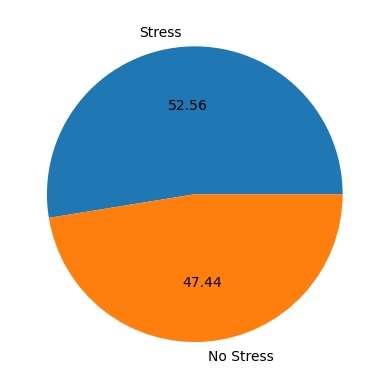

In [37]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['Stress','No Stress'],autopct="%0.2f")

In [38]:
!pip install nltk 
import nltk


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [39]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ASHU\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [40]:
#finding total characters
df['total_char']=df['text'].apply(len)

C:\Users\ASHU\AppData\Local\Temp\ipykernel_11312\3205013250.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_char']=df['text'].apply(len)


In [41]:
#finding total words
df['total_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

C:\Users\ASHU\AppData\Local\Temp\ipykernel_11312\3067417827.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))


In [42]:
#finding total sentence
df['total_sentence']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))
df

C:\Users\ASHU\AppData\Local\Temp\ipykernel_11312\894478764.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_sentence']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))


,subreddit,text,target,total_char,total_words,total_sentence
0,ptsd,"He said he had not felt that way before, sugge...",1,571,133,4
1,assistance,"Hey there r/assistance, Not sure if this is th...",0,588,120,3
2,ptsd,My mom then hit me with the newspaper and it s...,1,847,183,5
3,relationships,"until i met my new boyfriend, he is amazing, h...",1,1277,304,4
4,survivorsofabuse,October is Domestic Violence Awareness Month a...,1,533,105,5
...,...,...,...,...,...,...
2833,relationships,"* Her, a week ago: Precious, how are you? (I i...",0,438,111,5
2834,ptsd,I don't have the ability to cope with it anymo...,1,728,162,5
2835,anxiety,In case this is the first time you're reading ...,0,848,151,5
2836,almosthomeless,Do you find this normal? They have a good rela...,0,355,73,5


In [44]:
#positive movie review
df[df['target']==1][['total_char','total_words','total_sentence']].describe()

,total_char,total_words,total_sentence
count,1488.000000,1488.000000,1488.000000
mean,459.696237,102.344758,4.838038
std,180.849368,38.264838,0.551313
min,6.000000,3.000000,1.000000
25%,341.750000,77.000000,5.000000
50%,427.500000,96.000000,5.000000
75%,545.250000,120.000000,5.000000
max,1639.000000,351.000000,6.000000


In [45]:
#negative movie review
df[df['target']==0][['total_char','total_words','total_sentence']].describe()

,total_char,total_words,total_sentence
count,1343.000000,1343.000000,1343.000000
mean,434.630678,95.006701,4.720030
std,152.734662,32.205295,0.664588
min,6.000000,3.000000,1.000000
25%,336.000000,74.000000,5.000000
50%,413.000000,90.000000,5.000000
75%,515.000000,111.000000,5.000000
max,1358.000000,311.000000,6.000000


In [46]:
import seaborn as sns

<Axes: xlabel='total_char', ylabel='Count'>

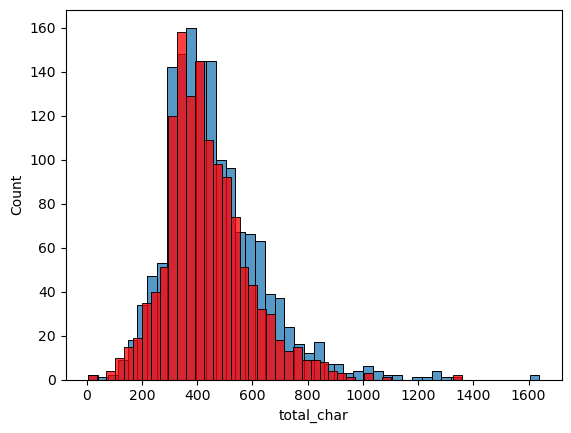

In [47]:
sns.histplot(df[df['target']==1]['total_char'])
sns.histplot(df[df['target']==0]['total_char'],color='red')

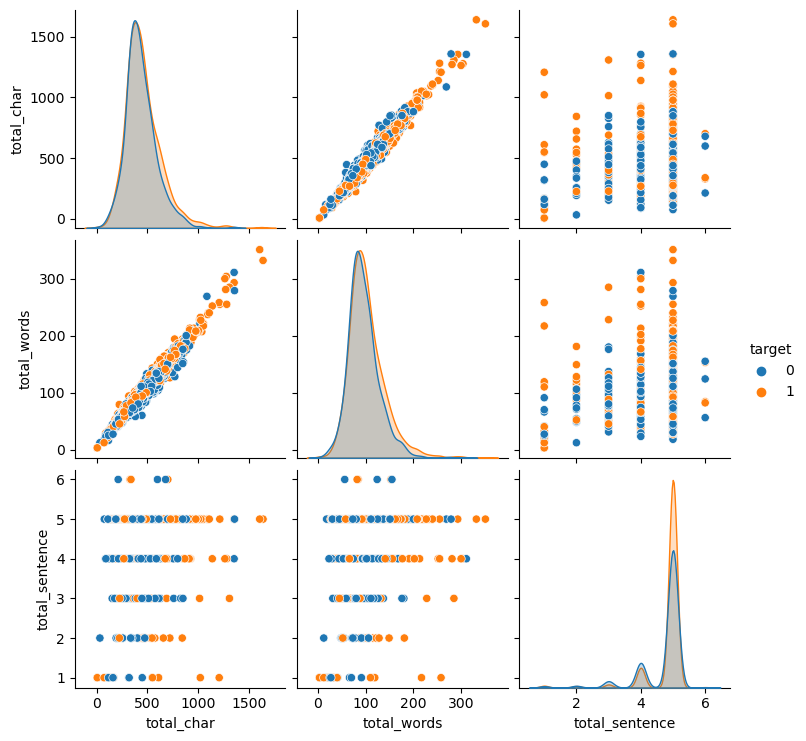

In [48]:
sns.pairplot(df,hue='target')

C:\Users\ASHU\AppData\Local\Temp\ipykernel_11312\4277794465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

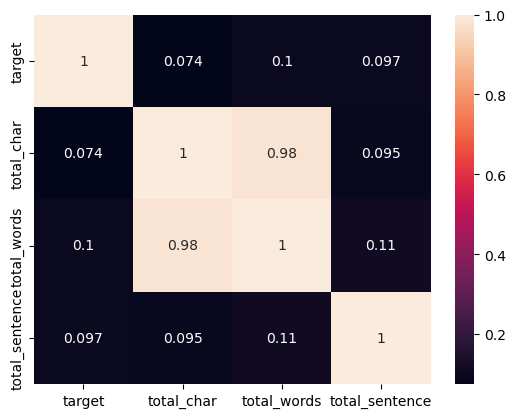

In [49]:
sns.heatmap(df.corr(),annot=True)

## 3.Text Preprocessing
- Lower case
- Tokenization
- Eliminating special characters
- Eliminating stop letters & punctuation
- Stemming

In [50]:
#for stopwords & punctuations
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords.words('english')

import string
string.punctuation

#for stemming
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASHU\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [51]:
#creating a function
def transform(text):
    text=text.lower()                                   #converting into lowercase
    text=nltk.word_tokenize(text)                       #converting into tokens
    
    new=[]             
    for i in text:                                      #eliminating special characters
        if i.isalnum():
            new.append(i)
    
    text=new[:]                                         #cloning the data becoz list is mutable
    new.clear()
    for i in text:                                      #eliminating stopletters & punctuations
        if i not in stopwords.words('english') and i not in string.punctuation:
            new.append(i)
            
    text=new[:]
    new.clear()
    for i in text:
        new.append(ps.stem(i))
        
    return " ".join(new)

In [52]:
df['transformed']=df['text'].apply(transform)

C:\Users\ASHU\AppData\Local\Temp\ipykernel_11312\1433238750.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transformed']=df['text'].apply(transform)


In [53]:
df

,subreddit,text,target,total_char,total_words,total_sentence,transformed
0,ptsd,"He said he had not felt that way before, sugge...",1,571,133,4,said felt way sugget go rest trigger ahead you...
1,assistance,"Hey there r/assistance, Not sure if this is th...",0,588,120,3,hey sure right place post goe current student ...
2,ptsd,My mom then hit me with the newspaper and it s...,1,847,183,5,mom hit newspap shock would know like play hit...
3,relationships,"until i met my new boyfriend, he is amazing, h...",1,1277,304,4,met new boyfriend amaz kind sweet good student...
4,survivorsofabuse,October is Domestic Violence Awareness Month a...,1,533,105,5,octob domest violenc awar month domest violenc...
...,...,...,...,...,...,...,...
2833,relationships,"* Her, a week ago: Precious, how are you? (I i...",0,438,111,5,week ago preciou ignor jan 1 happi year precio...
2834,ptsd,I don't have the ability to cope with it anymo...,1,728,162,5,abil cope anymor tri lot thing trigger shut wo...
2835,anxiety,In case this is the first time you're reading ...,0,848,151,5,case first time read post look peopl will comp...
2836,almosthomeless,Do you find this normal? They have a good rela...,0,355,73,5,find normal good relationship main problem see...


In [54]:
!pip install wordcloud


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [55]:
from wordcloud import WordCloud                           #Highlight the important word
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [56]:
positive_review=wc.generate(df[df['target']==1]['transformed'].str.cat(sep=''))

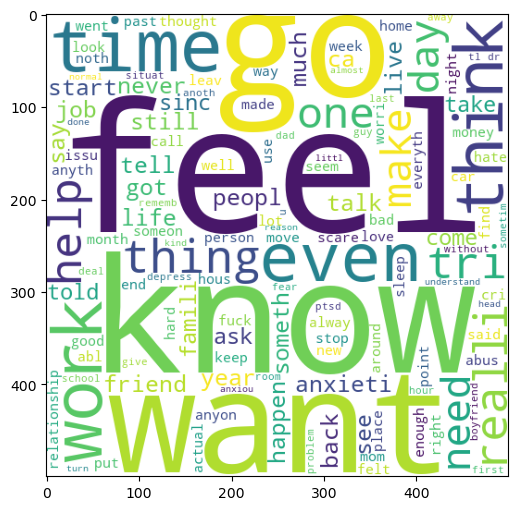

In [57]:
plt.figure(figsize=(15,6))
plt.imshow(positive_review)

In [58]:
negative_review=wc.generate(df[df['target']==0]['transformed'].str.cat(sep=''))

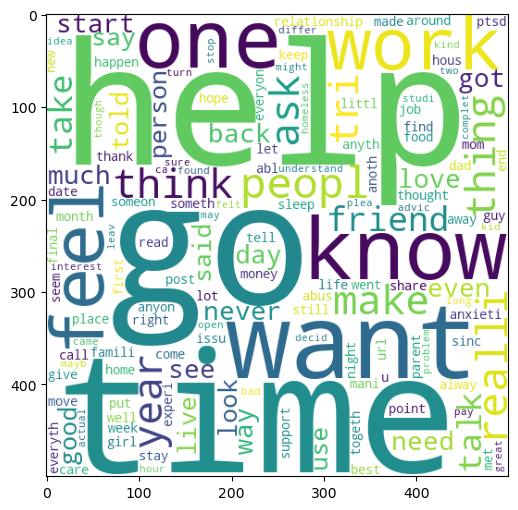

In [59]:
plt.figure(figsize=(15,6))
plt.imshow(negative_review)

In [60]:
negative_words=[]                                                   #creating a list of negative words
for msg in df[df['target']==0]['transformed'].tolist():
    for words in msg.split():
        negative_words.append(words)

In [61]:
len(negative_words)

50304

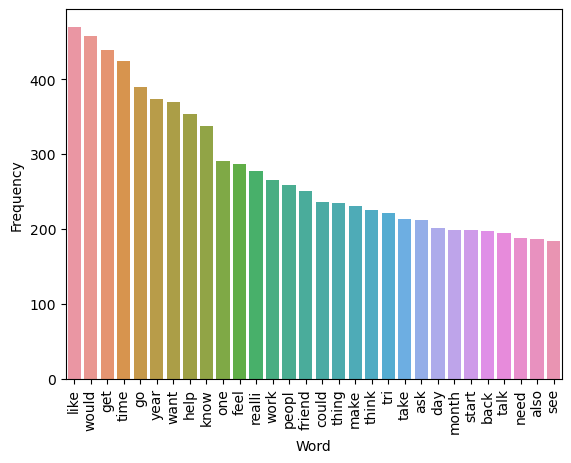

In [62]:
from collections import Counter
# Assuming negative _words_corpus is a list of strings
negative_words_counter = Counter(negative_words)
top_30_words = dict(negative_words_counter.most_common(30))

# Create a DataFrame from the top 30 words
df_top_30_words = pd.DataFrame(list(top_30_words.items()), columns=['Word', 'Frequency'])

# Create the bar plot
sns.barplot(x='Word', y='Frequency', data=df_top_30_words)
plt.xticks(rotation='vertical')
plt.show()

In [63]:
positive_words=[]                                                   #creating a list of negative words
for msg in df[df['target']==1]['transformed'].tolist():
    for words in msg.split():
        positive_words.append(words)

In [64]:
len(positive_words)

58050

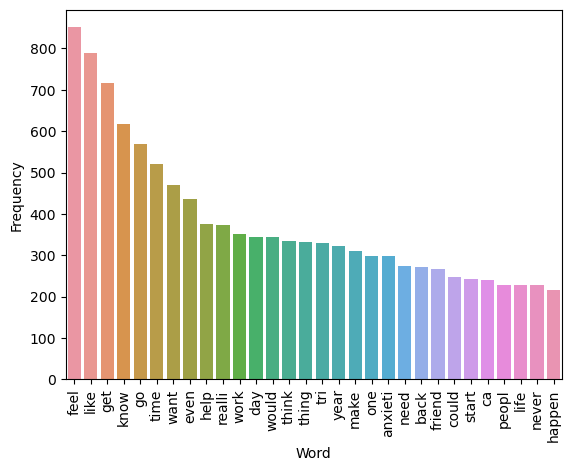

In [65]:
# Assuming positive _words_corpus is a list of strings
positive_words_counter = Counter(positive_words)
top_30_words = dict(positive_words_counter.most_common(30))

# Create a DataFrame from the top 30 words
df_top_30_words = pd.DataFrame(list(top_30_words.items()), columns=['Word', 'Frequency'])

# Create the bar plot
sns.barplot(x='Word', y='Frequency', data=df_top_30_words)
plt.xticks(rotation='vertical')
plt.show()

## 4. Model Building
- Converting text to numbers(text vectorization)
- Using bag of words

In [66]:
#these libraries used for converting a collection of texts documents into tokens or frequency
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer()

In [67]:
#converting sparse array to dense array
x=tfidf.fit_transform(df['transformed']).toarray()

In [68]:
#appending the total_words columns to x
#x=np.hstack((x,df['total_words'].values.reshape(-1,1)))

In [69]:
y=df['target'].values
y

array([1, 0, 1, ..., 0, 0, 1], dtype=int64)

In [70]:
#importing train_test_split for splitting the data into train data and test data
from sklearn.model_selection import train_test_split
#size of test data is 20% of data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [71]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [72]:
gnb.fit(x_train,y_train)
y_pred1=gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.6172839506172839
[[118 132]
 [ 85 232]]
0.6373626373626373


In [73]:
mnb.fit(x_train,y_train)
y_pred2=mnb.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.7160493827160493
[[115 135]
 [ 26 291]]
0.6830985915492958


In [74]:
bnb.fit(x_train,y_train)
y_pred3=bnb.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.7495590828924162
[[162  88]
 [ 54 263]]
0.7492877492877493


#### Here we are going to choose Tfidf --> (Multinomial NB) becoz it gives best precision score & accuracy score among all.

#### Improving model performance
- Checking the changing of max_features parameter of Tfidf (max_features = number of unique words).
- Checking the minmaxscaler for x_train.
- Appending the created column(total_words) in x (result- precision score is increasing but accuracy score is decreasing),so we will not append the column in x_train.

#### We are not going to change anything in the model because our model giving best results without making any change. 

In [76]:
import pickle
pickle.dump(tfidf,open('vectorizer1.pkl','wb'))
pickle.dump(mnb,open('model1.pkl','wb'))